In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
x = pd.read_csv(r"C:\Users\sree0\Downloads\biden.csv")

C:\Users\sree0\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,8,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
y = pd.read_csv(r"C:\Users\sree0\Downloads\trump_final_result.csv")

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171237 entries, 0 to 171236
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            171237 non-null  object 
 1   tweet                 171237 non-null  object 
 2   likes                 171236 non-null  float64
 3   retweet_count         171236 non-null  float64
 4   user_id               171236 non-null  float64
 5   user_followers_count  171236 non-null  object 
 6   user_location         171236 non-null  object 
 7   lat                   171236 non-null  float64
 8   long                  171236 non-null  object 
 9   city                  84290 non-null   object 
 10  country               171236 non-null  object 
 11  continent             171236 non-null  object 
 12  state                 131563 non-null  object 
 13  processed_text        171236 non-null  object 
 14  ner                   171236 non-null  object 
 15  

In [6]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255444 entries, 0 to 255443
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            255444 non-null  object 
 1   tweet                 255444 non-null  object 
 2   likes                 255441 non-null  float64
 3   retweet_count         255441 non-null  float64
 4   user_id               255441 non-null  float64
 5   user_followers_count  255441 non-null  object 
 6   user_location         255441 non-null  object 
 7   lat                   255441 non-null  float64
 8   long                  255439 non-null  object 
 9   city                  126817 non-null  object 
 10  country               255441 non-null  object 
 11  continent             255439 non-null  object 
 12  state                 191052 non-null  object 
 13  processed_text        255441 non-null  object 
 14  ner                   255440 non-null  object 
 15  

C:\Users\sree0\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


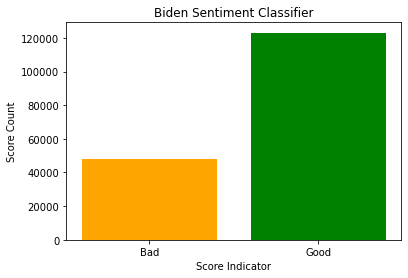

In [7]:
## Biden Score - Good or Bad Graph
x_required = x[['user_id','predict_score_bi','entity']]
x_required.fillna('null',inplace=True)
x_required = x_required[~x_required["predict_score_bi"].str.contains('R',na=False)]
x_required = x_required[~x_required["predict_score_bi"].str.contains('S',na=False)]
x_required = x_required[~x_required["predict_score_bi"].str.contains('null',na=False)]
x_required["predict_score_bi"] = pd.to_numeric(x_required['predict_score_bi'], downcast="float")
x_required['indicator'] = x_required['predict_score_bi'].apply(lambda x: "Good" if x >= 0.5 else "Bad")
x_count = x_required.groupby('indicator').count().reset_index()

##plotting graph
plt.bar(x_count['indicator'], x_count['predict_score_bi'],color=['orange','Green'])
plt.xlabel("Score Indicator")
plt.ylabel("Score Count")
plt.title("Biden Sentiment Classifier")
plt.show()

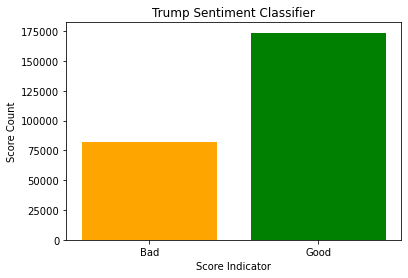

In [8]:
## Trump Score - Good or Bad Graph
y_required = y[['user_id','predict_score_bi']]
y_required.fillna('null',inplace=True)
y_required = y_required[~y_required["predict_score_bi"].str.contains('R',na=False)]
y_required = y_required[~y_required["predict_score_bi"].str.contains('S',na=False)]
y_required = y_required[~y_required["predict_score_bi"].str.contains('null',na=False)]
y_required["predict_score_bi"] = pd.to_numeric(y_required['predict_score_bi'], downcast="float")
y_required['indicator'] = y_required['predict_score_bi'].apply(lambda x: "Good" if x >= 0.5 else "Bad")
y_count = y_required.groupby('indicator').count().reset_index()

##plotting graph
plt.bar(y_count['indicator'], y_count['predict_score_bi'],color=['orange','Green'])
plt.xlabel("Score Indicator")
plt.ylabel("Score Count")
plt.title("Trump Sentiment Classifier")
plt.show()

In [15]:
##Most frequent entity 
x_entity = x[['entity','predict_score_bi']]
y_entity = y[['entity','predict_score_bi']]
##Top 5 Biden entity
x_entity.fillna('null',inplace=True)
x_entity = x_entity[~x_entity["predict_score_bi"].str.contains('R',na=False)]
x_entity = x_entity[~x_entity["predict_score_bi"].str.contains('S',na=False)]
x_entity = x_entity[~x_entity["predict_score_bi"].str.contains('null',na=False)]
x_entity = x_entity[x_entity['entity']!="null"]
x_entity["predict_score_bi"] = pd.to_numeric(x_entity['predict_score_bi'], downcast="float")
x_entity = x_entity[['entity','predict_score_bi']].drop_duplicates()
x_top_enti = x_entity.sort_values('predict_score_bi',ascending=False).head(10)
##Top 5 Trump entity
y_entity.fillna('null',inplace=True)
y_entity = y_entity[~y_entity["predict_score_bi"].str.contains('R',na=False)]
y_entity = y_entity[~y_entity["predict_score_bi"].str.contains('S',na=False)]
y_entity = y_entity[~y_entity["predict_score_bi"].str.contains('null',na=False)]
y_entity = y_entity[y_entity['entity']!="null"]
y_entity["predict_score_bi"] = pd.to_numeric(y_entity['predict_score_bi'], downcast="float")
y_entity = y_entity[['entity','predict_score_bi']].drop_duplicates()
y_top_enti = y_entity.sort_values('predict_score_bi',ascending=False).head(10)




In [22]:
import re
words = re.findall(r'\w+', 'hi,how')
print(words)

['hi', 'how']


In [23]:
def extract_word_to_string(text):
  try:
    words = re.findall(r'\w+', text) # a list of words
    string = " ".join(review for review in words)
    return string
  except:
    pass

In [46]:
temp_entity = x.entity
temp_str_df = temp_entity.apply(extract_word_to_string)

In [47]:
str_concat = temp_str_df.str.cat(sep=' ')
from collections import Counter, OrderedDict
word_list = str_concat.split()
print(len(word_list))
#cap_words = [word.upper() for word in words] #capitalizes all the words

word_counts = Counter(word_list) #counts the number each time a word appears
mostcommon_words = OrderedDict(word_counts.most_common())
print(mostcommon_words)

468040
OrderedDict([('Biden', 40143), ('JoeBiden', 37109), ('Trump', 18019), ('DonaldTrump', 4607), ('TrumpBiden', 4578), ('America', 4338), ('HunterBiden', 3485), ('China', 3304), ('Joe', 3187), ('BidenHarris2020', 2401), ('wtpBlue', 2288), ('American', 2284), ('USA', 2064), ('VOTE', 2007), ('BidenTrump', 1971), ('US', 1747), ('BidenHarris', 1721), ('Obama', 1696), ('BLM', 1587), ('COVID19', 1463), ('BidenHarrisToSaveAmerica', 1366), ('KamalaHarris', 1326), ('MAGA', 1239), ('wtpBiden', 1230), ('DumpTrump', 1229), ('Election2020', 1220), ('Vote', 1215), ('Bidenis', 1156), ('DemCast', 1103), ('FBI', 1062), ('DemVoice1', 1024), ('Hunter', 1002), ('CNN', 956), ('Itis', 950), ('Democratic', 936), ('HunterBidenEmails', 928), ('BIDEN', 912), ('Debates2020', 908), ('BidenBidenHarris2020', 889), ('USElection2020', 814), ('GOPRepublican', 812), ('Trump2020', 808), ('Florida', 794), ('Russia', 782), ('UnitedStates', 780), ('Chinese', 769), ('GOP', 745), ('Watch', 735), ('JoeBidenis', 727), ('Tru

In [49]:
data_order = pd.DataFrame(mostcommon_words.items(), columns=['entity', 'count'])

In [51]:
data_order.dropna(inplace=True)

In [69]:
data_order

count
entity                
Biden            40143
JoeBiden         37109
Trump            18019
DonaldTrump       4607
TrumpBiden        4578
America           4338
HunterBiden       3485
China             3304
Joe               3187
BidenHarris2020   2401
wtpBlue           2288
American          2284
USA               2064
VOTE              2007
BidenTrump        1971
US                1747
BidenHarris       1721
Obama             1696
BLM               1587
COVID19           1463

In [52]:
print(len(data_order['entity'].to_list()))

96387


In [53]:
data_order = data_order.head(20)

In [59]:
data_order.set_index('entity',inplace=True)

Text(0, 0.5, 'Count')

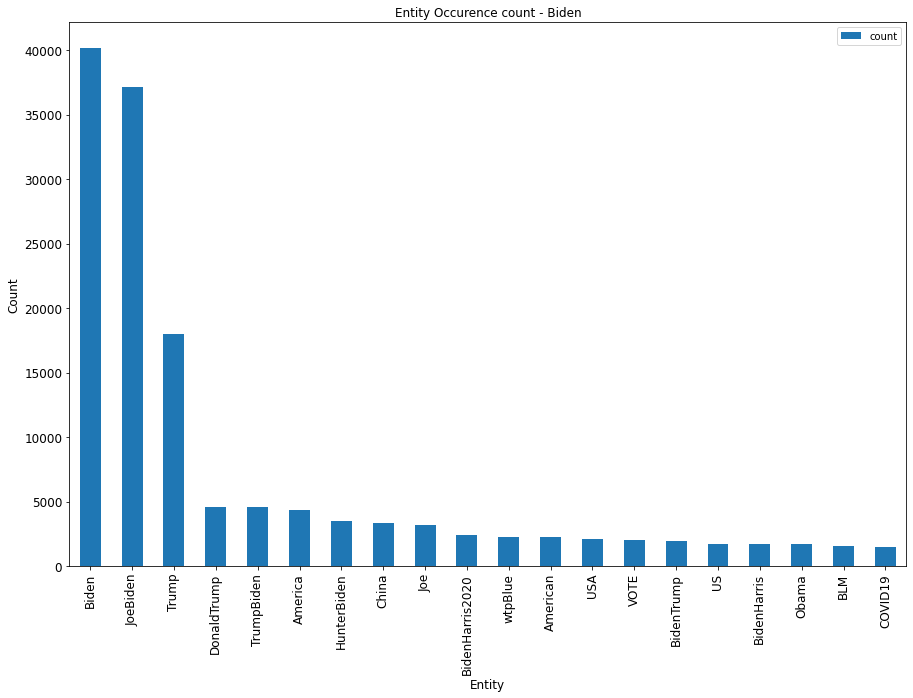

In [61]:
import matplotlib.pyplot as plt
ax = data_order.plot(kind='bar', title ="Entity Occurence count - Biden",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Entity",fontsize=12)
ax.set_ylabel("Count",fontsize=12)

In [66]:
temp_entity_2 = y.entity
temp_str_df_2 = temp_entity_2.apply(extract_word_to_string)
str_concat_1 = temp_str_df_2.str.cat(sep=' ')
#from collections import Counter, OrderedDict
word_list_2 = str_concat_1.split()
print(len(word_list_2))
#cap_words = [word.upper() for word in words] #capitalizes all the words

word_counts_2 = Counter(word_list_2) #counts the number each time a word appears
mostcommon_words_2 = OrderedDict(word_counts_2.most_common())
print(mostcommon_words_2)

618525
OrderedDict([('Trump', 93979), ('DonaldTrump', 17766), ('Biden', 13788), ('America', 6052), ('JoeBiden', 5940), ('MAGA', 5681), ('COVID19', 4854), ('TrumpBiden', 4827), ('USA', 3726), ('American', 3601), ('China', 3486), ('US', 3437), ('Trumpis', 3186), ('TRUMP', 2669), ('VOTE', 2475), ('GOP', 2412), ('MAGA2020', 2190), ('Election2020', 2046), ('BidenTrump', 2045), ('COVID', 1934), ('BidenHarris2020', 1791), ('Obama', 1603), ('Donald', 1572), ('Republican', 1501), ('Itis', 1462), ('Russia', 1403), ('VoteHimOut', 1378), ('Joe', 1352), ('CNN', 1331), ('Trump2020', 1280), ('Florida', 1255), ('TrumpTrump2020', 1192), ('THE', 1177), ('UnitedStates', 1114), ('Debates2020', 1106), ('Vote', 1066), ('tRump', 1038), ('USElection2020', 1033), ('HunterBiden', 1017), ('NOT', 1009), ('TrumpVirus', 992), ('WhiteHouse', 970), ('TrumpIsPathetic', 961), ('Covid', 951), ('Russian', 913), ('FTrumpS', 913), ('FBI', 892), ('FuckTrumpsShit', 867), ('TRUMP2020ToSaveAmerica', 866), ('Don', 855), ('NewYo

Text(0, 0.5, 'Count')

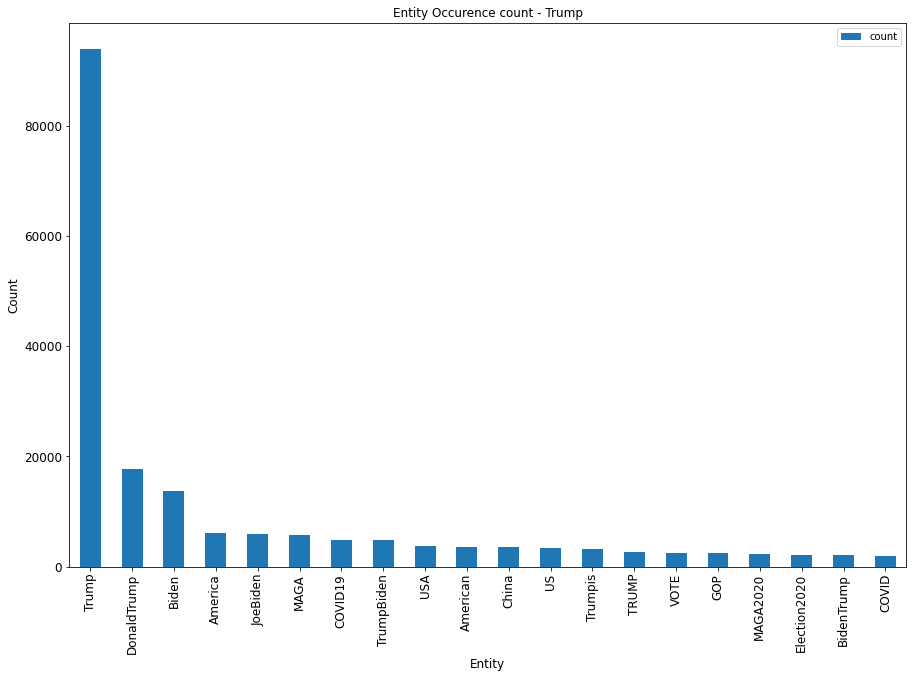

In [67]:
data_order_2 = pd.DataFrame(mostcommon_words_2.items(), columns=['entity', 'count'])
data_order_2.dropna(inplace=True)
data_order_2 = data_order_2.head(20)
data_order_2.set_index('entity',inplace=True)
#import matplotlib.pyplot as plt
ax2 = data_order_2.plot(kind='bar', title ="Entity Occurence count - Trump",figsize=(15,10),legend=True, fontsize=12)
ax2.set_xlabel("Entity",fontsize=12)
ax2.set_ylabel("Count",fontsize=12)

In [68]:
data_order_2

count
entity             
Trump         93979
DonaldTrump   17766
Biden         13788
America        6052
JoeBiden       5940
MAGA           5681
COVID19        4854
TrumpBiden     4827
USA            3726
American       3601
China          3486
US             3437
Trumpis        3186
TRUMP          2669
VOTE           2475
GOP            2412
MAGA2020       2190
Election2020   2046
BidenTrump     2045
COVID          1934

In [16]:
x_top_enti.style.hide_index()

In [17]:
##Most frequent entity 
x_entity = x[['entity','predict_score_bi']]
y_entity = y[['entity','predict_score_bi']]
##Top 10 Biden entity - Bad
x_entity.fillna('null',inplace=True)
x_entity = x_entity[~x_entity["predict_score_bi"].str.contains('R',na=False)]
x_entity = x_entity[~x_entity["predict_score_bi"].str.contains('S',na=False)]
x_entity = x_entity[~x_entity["predict_score_bi"].str.contains('null',na=False)]
x_entity = x_entity[x_entity['entity']!="null"]
x_entity["predict_score_bi"] = pd.to_numeric(x_entity['predict_score_bi'], downcast="float")
x_entity = x_entity[['entity','predict_score_bi']].drop_duplicates()
x_top_enti = x_entity.sort_values('predict_score_bi',ascending=True).head(10)
##Top 10 Trump entity - Bad
y_entity.fillna('null',inplace=True)
y_entity = y_entity[~y_entity["predict_score_bi"].str.contains('R',na=False)]
y_entity = y_entity[~y_entity["predict_score_bi"].str.contains('S',na=False)]
y_entity = y_entity[~y_entity["predict_score_bi"].str.contains('null',na=False)]
y_entity = y_entity[y_entity['entity']!="null"]
y_entity["predict_score_bi"] = pd.to_numeric(y_entity['predict_score_bi'], downcast="float")
y_entity = y_entity[['entity','predict_score_bi']].drop_duplicates()
y_top_enti = y_entity.sort_values('predict_score_bi',ascending=True).head(10)

In [18]:
x_top_enti.style.hide_index()

In [70]:
## Percentage of USA states containing good & bad tweets
x_usa = x[x["country"]=="United States of America"]
y_usa = y[y["country"]=="United States of America"]
x_indi = x_usa[['state','predict_score_bi']]
y_indi = y_usa[['state','predict_score_bi']]
y_indi = y_indi[~y_indi["predict_score_bi"].str.contains('R',na=False)]
y_indi = y_indi[~y_indi["predict_score_bi"].str.contains('S',na=False)]
y_indi = y_indi[~y_indi["predict_score_bi"].str.contains('null',na=False)]
y_indi["predict_score_bi"] = pd.to_numeric(y_indi['predict_score_bi'], downcast="float")
y_indi['indicator'] = y_indi['predict_score_bi'].apply(lambda x: "Good" if x >= 0.5 else "Bad")
x_indi = x_indi[~x_indi["predict_score_bi"].str.contains('R',na=False)]
x_indi = x_indi[~x_indi["predict_score_bi"].str.contains('S',na=False)]
x_indi = x_indi[~x_indi["predict_score_bi"].str.contains('null',na=False)]
x_indi["predict_score_bi"] = pd.to_numeric(x_indi['predict_score_bi'], downcast="float")
x_indi['indicator'] = x_indi['predict_score_bi'].apply(lambda x: "Good" if x >= 0.5 else "Bad")
##To get top 5 States based on number of tweets
y_top_5_state = y_indi.groupby("state").agg({'predict_score_bi':'count'}).reset_index()
y_top_5_state = y_top_5_state.sort_values('predict_score_bi',ascending=False).head(5)
list_state = y_top_5_state['state'].to_list()
print(list_state)

x_top_5_state = x_indi.groupby("state").agg({'predict_score_bi':'count'}).reset_index()
x_top_5_state = x_top_5_state.sort_values('predict_score_bi',ascending=False).head(5)
list_state_2 = x_top_5_state['state'].to_list()
print(list_state_2)

## To get percentage mix for the top 5 states
y_indi_filtered = y_indi[y_indi['state'].isin(list_state)]
y_indi_group = y_indi_filtered.groupby(['state','indicator']).agg({'predict_score_bi':'count'})
y_indi_state = y_indi_filtered.groupby('state').agg({'predict_score_bi':'count'})
y_final_perc = y_indi_group.divide(y_indi_state,level='state')*100
y_final_perc = y_final_perc.unstack()
#y_final_perc.reset_index(inplace=True)
print(y_final_perc)

x_indi_filtered = x_indi[x_indi['state'].isin(list_state_2)]
x_indi_group = x_indi_filtered.groupby(['state','indicator']).agg({'predict_score_bi':'count'})
x_indi_state = x_indi_filtered.groupby('state').agg({'predict_score_bi':'count'})
x_final_perc = x_indi_group.divide(x_indi_state,level='state')*100
x_final_perc = x_final_perc.unstack()
print("\n")
print(x_final_perc)

['California', 'New York', 'Florida', 'Texas', 'District of Columbia']
['California', 'New York', 'Texas', 'Florida', 'District of Columbia']
                     predict_score_bi           
indicator                         Bad       Good
state                                           
California                  32.477936  67.522064
District of Columbia        35.818847  64.181153
Florida                     29.057505  70.942495
New York                    32.626879  67.373121
Texas                       29.967920  70.032080


                     predict_score_bi           
indicator                         Bad       Good
state                                           
California                  28.066745  71.933255
District of Columbia        29.354005  70.645995
Florida                     26.648930  73.351070
New York                    27.452994  72.547006
Texas                       28.212994  71.787006


Text(0, 0.5, '% of Score')

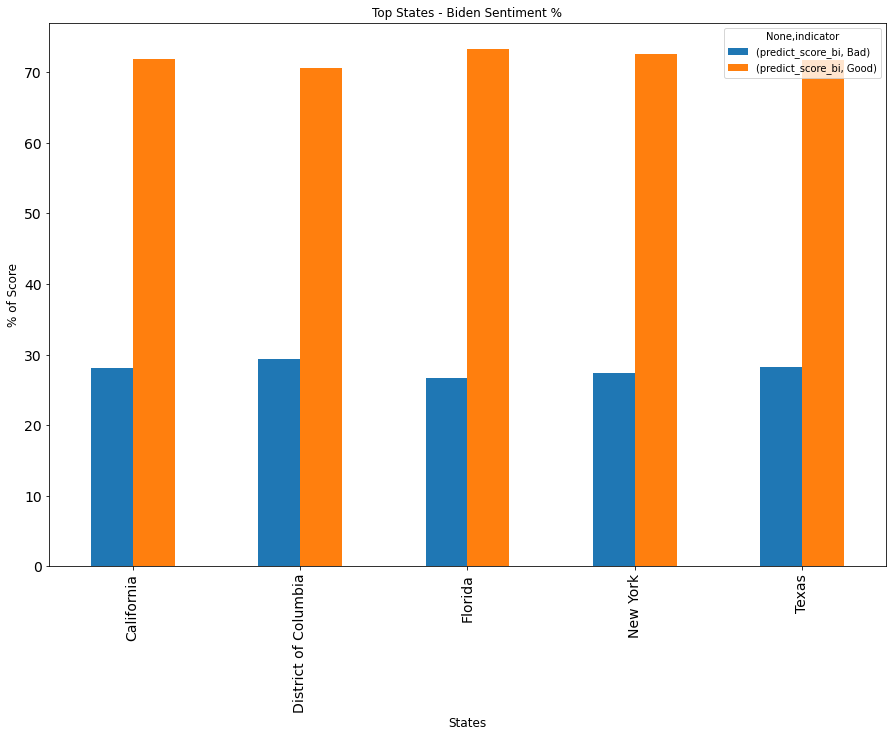

In [71]:
fig = x_final_perc.plot(kind='bar',title='Top States - Biden Sentiment %',figsize=(15,10),legend=True,fontsize=14)
fig.set_xlabel("States",fontsize=12)
fig.set_ylabel("% of Score",fontsize=12)

Text(0, 0.5, '% of Score')

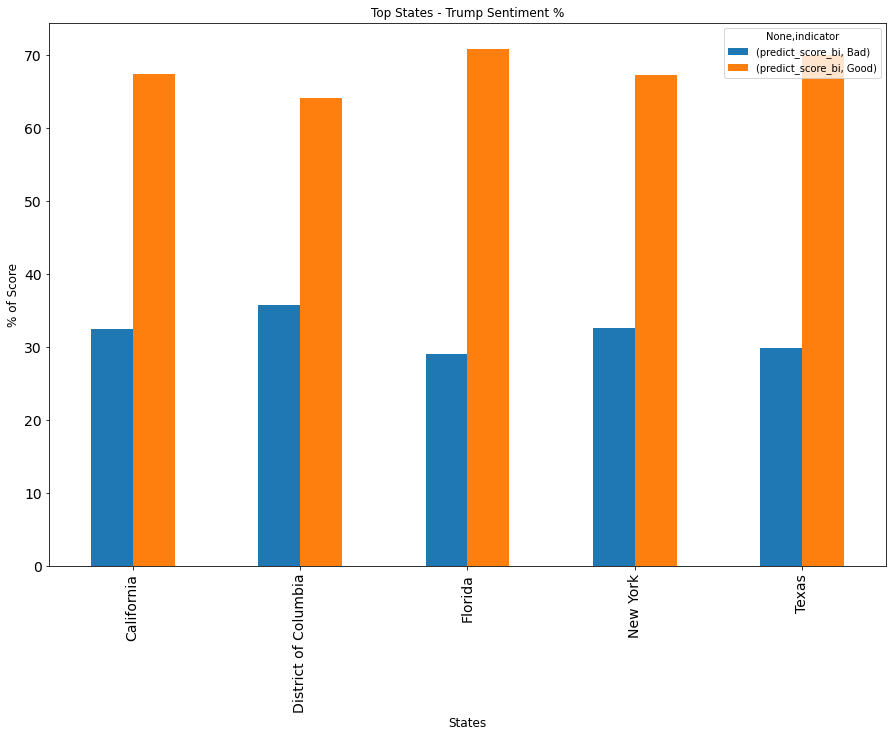

In [72]:
fig_2 = y_final_perc.plot(kind='bar',title='Top States - Trump Sentiment %',figsize=(15,10),legend=True,fontsize=14)
fig_2.set_xlabel("States",fontsize=12)
fig_2.set_ylabel("% of Score",fontsize=12)